# ¿Qué es un Denoising Autoencoder?


A denoising autoencoder as its name sugests, is a robust autoencoder which can be used for error correction. It is designed to learn by training on corrupted inputs and learning how to reconstruct to the original. An input is given, which is the noisy version, that added noice with Gaussian noice, masking pixels or dropout. The is passed through an encoder, which maps to a lower dimensional latent space to learn how to remove noice. The there is the decoder, qich reconstruct to the original representation, it wants to minimize the difference between the reconstructed and the input with the loss funnction.

In [124]:
import tensorflow as tf
from keras import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, BatchNormalization

from keras.utils import to_categorical

In [125]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'  # Suprime WARNINGS, muestra solo errores

In [126]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar100.load_data()

In [127]:
model = Sequential([
     Conv2D(
        filters=32,
        strides=1,
        kernel_size= (3,3),
        padding='same', #La imagen queda del mismo tamaño
        activation='relu',
        input_shape=(32,32,3)
    ),
     
    BatchNormalization(),
    MaxPooling2D(pool_size=(2,2)),


    Conv2D(
        strides=1,
        filters=64,
        kernel_size= (3,3),
        activation='relu',
        padding='same', #La imagen queda del mismo tamaño
         ),
    
    BatchNormalization(),
    MaxPooling2D(pool_size=(2,2)),
    
    
    Conv2D(
        strides=1,
        filters=128,
        kernel_size= (3,3),
        activation='relu',
        padding='same', #La imagen queda del mismo tamaño
         ),
    
    BatchNormalization(),
    MaxPooling2D(pool_size=(2,2)),
    
    
    Conv2D(
        strides=1,
        filters=256,
        kernel_size= (3,3),
        activation='relu',
        padding='same', #La imagen queda del mismo tamaño
         ),
    
    BatchNormalization(),
    MaxPooling2D(pool_size=(2,2)),
    
    
    Conv2D(
        strides=1,
        filters=512,
        kernel_size= (3,3),
        activation='relu',
        padding='same', #La imagen queda del mismo tamaño
         ),
    
    BatchNormalization(),
    MaxPooling2D(pool_size=(2,2)),
    
    Conv2D(
        strides=1,
        filters=1024,
        kernel_size= (3,3),
        activation='relu',
        padding='same', #La imagen queda del mismo tamaño
         ),
    
    BatchNormalization(),    
    
    # Conv2D(
    #     strides=1,
    #     filters=2048,
    #     kernel_size= (3,3),
    #     activation='relu',
    #     padding='same', #La imagen queda del mismo tamaño
    #      ),
    
    # BatchNormalization(),    
    
    Flatten(),

    # Dense(units= 2048, activation='relu'),
    Dense(units= 1024, activation='relu'),
    Dense(units= 512, activation='relu'),
    Dense(units= 100, activation='softmax')
])

/home/estebanberumen/apps/Base/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [128]:
model.summary()

Model: "sequential_13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_68 (Conv2D)              │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_64          │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_58 (MaxPooling2D) │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_69 (Conv2D)              │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_65          │ (None, 16, 16, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_59 (MaxPooling2D) │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_70 (Conv2D)              │ (None, 8, 8, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_66          │ (None, 8, 8, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_60 (MaxPooling2D) │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_71 (Conv2D)              │ (None, 4, 4, 256)      │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_67          │ (None, 4, 4, 256)      │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_61 (MaxPooling2D) │ (None, 2, 2, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_72 (Conv2D)              │ (None, 2, 2, 512)      │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_68          │ (None, 2, 2, 512)      │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_62 (MaxPooling2D) │ (None, 1, 1, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_73 (Conv2D)              │ (None, 1, 1, 1024)     │     4,719,616 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_69          │ (None, 1, 1, 1024)     │         4,096 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_13 (Flatten)            │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_32 (Dense)                │ (None, 1024)           │     1,049,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_33 (Dense)                │ (None, 512)            │       524,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_34 (Dense)                │ (None, 100)            │        51,300 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,921,956 (30.22 MB)

 Trainable params: 7,917,924 (30.20 MB)

 Non-trainable params: 4,032 (15.75 KB)

In [129]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [130]:
x_train, x_test = x_train / 255.0, x_test / 255.0   # normalizar la imagen entre 0 y 1
y_train = to_categorical(y_train, 100)
y_test = to_categorical(y_test, 100)

In [131]:
model.fit(x_train, y_train, epochs=10, validation_split=0.10)

Epoch 1/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 20s 10ms/step - accuracy: 0.0840 - loss: 4.0502 - val_accuracy: 0.1246 - val_loss: 3.9748
Epoch 2/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 15s 10ms/step - accuracy: 0.2051 - loss: 3.1950 - val_accuracy: 0.2204 - val_loss: 3.1852
Epoch 3/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 30s 21ms/step - accuracy: 0.2898 - loss: 2.7473 - val_accuracy: 0.3138 - val_loss: 2.6709
Epoch 4/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 30s 21ms/step - accuracy: 0.3520 - loss: 2.4341 - val_accuracy: 0.2948 - val_loss: 2.8899
Epoch 5/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 30s 21ms/step - accuracy: 0.4155 - loss: 2.1673 - val_accuracy: 0.3118 - val_loss: 2.8245
Epoch 6/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 30s 21ms/step - accuracy: 0.4588 - loss: 1.9357 - val_accuracy: 0.3382 - val_loss: 2.6944
Epoch 7/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 31s 22ms/step - accuracy: 0.5137 - loss: 1.7086 - val_accuracy: 0.3854 - val_loss: 2.4571
Epoch 8/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 31s 22ms/step - accuracy: 0.5613 -

In [132]:
loss, accuracy = model.evaluate(x_test, y_test)
print(f"Pérdida en test: {loss:.4f}, Precisión en test: {accuracy:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.4166 - loss: 2.5222
Pérdida en test: 2.5316, Precisión en test: 0.4152


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 628ms/step


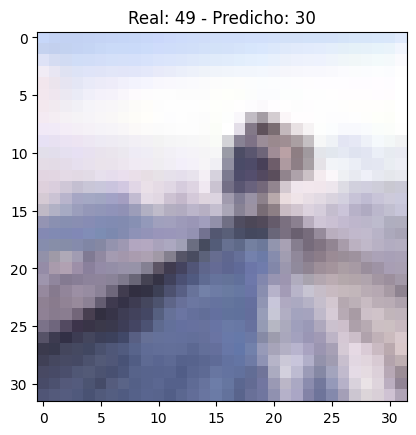

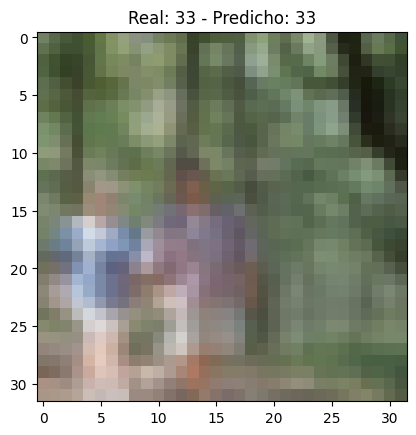

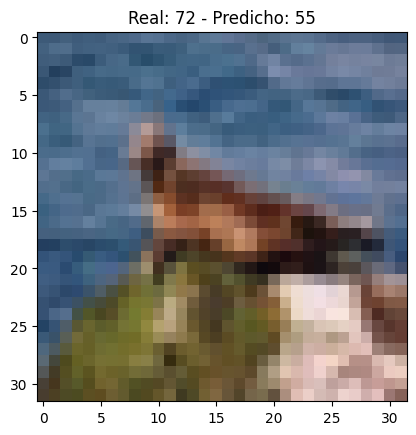

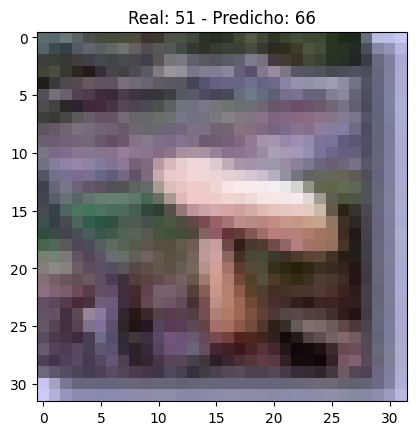

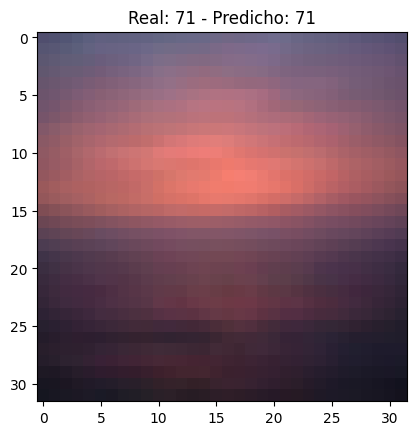

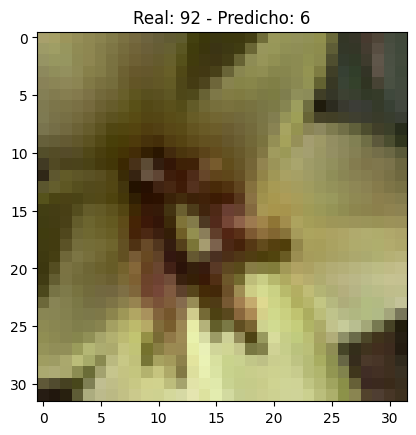

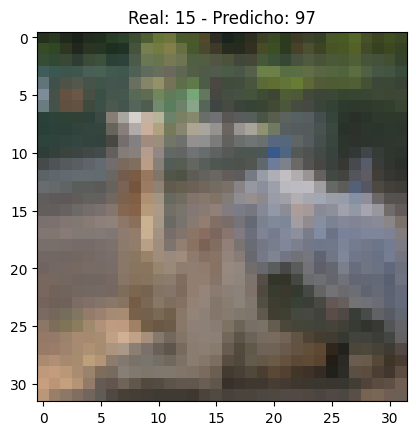

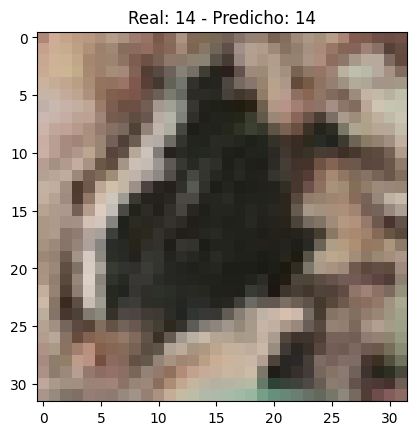

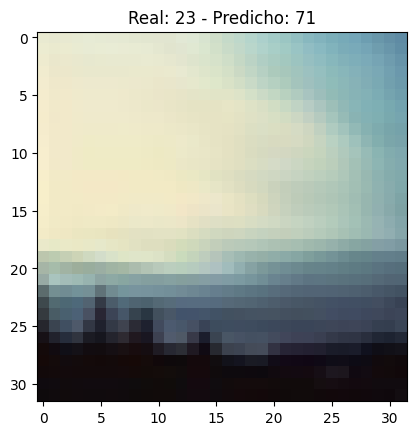

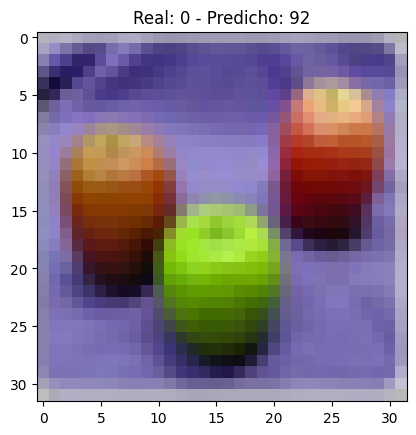

In [133]:
import numpy as np
import matplotlib.pyplot as plt

predictions = model.predict(x_test[:10])

for i in range(10):
    plt.imshow(x_test[i])
    plt.title(f"Real: {np.argmax(y_test[i])} - Predicho: {np.argmax(predictions[i])}")
    plt.show()